In [12]:
import pandas as pd #Manipulação de conjuntos de dados
import numpy as np #Manipulações numéricas
import matplotlib.pyplot as plt #Análises gráficas
import seaborn as sns #Análises gráficas
import io #Manipulação de funções do sistema
import os #Manipulação de funções do sistema
import sys #Manipulação de funções do sistema

sys.path.insert(0, os.getcwd()) #Inicialização da pasta do projeto

from recursos import treino_trat, teste_trat, caminho #Importação dos Conjuntos
from matplotlib.widgets import TextBox #Visualização de textos
from sklearn.preprocessing import StandardScaler #Normalização dos dados
from sklearn.model_selection import train_test_split #Divisões dos conjuntos treino/teste

Verificação dos Conjuntos de Dados

In [13]:
dfTreino = treino_trat()
dfTreino.head()

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,tipo_motor
0,8.0,0,0,2017,2017,67772.0,0,4,0,0,...,0,0,0,0,0,0,0,0,74732.590084,1.6
1,8.0,1,1,2017,2017,62979.0,1,4,0,0,...,0,1,0,1,0,1,0,0,81965.332634,2.0
2,16.0,2,2,2018,2019,44070.0,1,4,0,0,...,0,1,0,1,1,1,0,0,162824.814472,2.4
3,14.0,3,3,2013,2015,85357.0,1,4,1,0,...,1,1,0,1,0,0,0,0,123681.358857,2.0
4,8.0,4,4,2013,2015,71491.0,1,4,2,0,...,0,0,0,0,1,1,1,1,82419.763891,2.0


In [14]:
dfTest = teste_trat()
dfTest.head()

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,anunciante,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda
0,8.0,0,0,2021,2021,20258.0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.0,1,1,2021,2021,53045.0,0,2,1,0,...,1,0,0,0,1,0,0,0,1,0
2,8.0,2,2,2018,2019,32486.0,1,4,2,0,...,0,0,0,0,0,0,0,1,1,0
3,16.0,3,3,2019,2020,24937.0,1,4,3,0,...,1,0,0,0,1,0,0,0,1,0
4,8.0,4,4,2019,2019,62074.0,1,4,3,0,...,1,0,0,0,0,0,0,0,1,0


Resumo das Variáveis

In [15]:
display(dfTreino.describe(include=[np.number]))

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,tipo_motor
count,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,...,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04,29584.000000
mean,10.309931,10.069058,70.043131,2016.758552,2017.808985,58430.592077,1.133011,3.940677,0.897276,0.008383,...,0.171072,0.741009,0.352319,0.689968,0.335485,0.462345,0.147546,0.199770,1.330239e+05,1.929445
std,3.481502,6.886474,73.956687,4.062422,2.673930,32561.769309,0.540913,0.338360,1.162357,0.091175,...,0.376578,0.438088,0.477701,0.462514,0.472168,0.498588,0.354655,0.399834,8.166287e+04,0.900778
min,8.000000,0.000000,0.000000,1985.000000,1997.000000,100.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.869951e+03,0.600000
25%,8.000000,3.000000,19.000000,2015.000000,2016.000000,31214.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.657177e+04,1.500000
50%,8.000000,9.000000,49.000000,2018.000000,2018.000000,57434.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.143558e+05,2.000000
75%,14.000000,14.000000,91.000000,2019.000000,2020.000000,81953.500000,1.000000,4.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.636796e+05,2.000000
max,21.000000,39.000000,456.000000,2022.000000,2023.000000,390065.000000,6.000000,4.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.359813e+06,90.000000


Vericação da Distribuição do Target

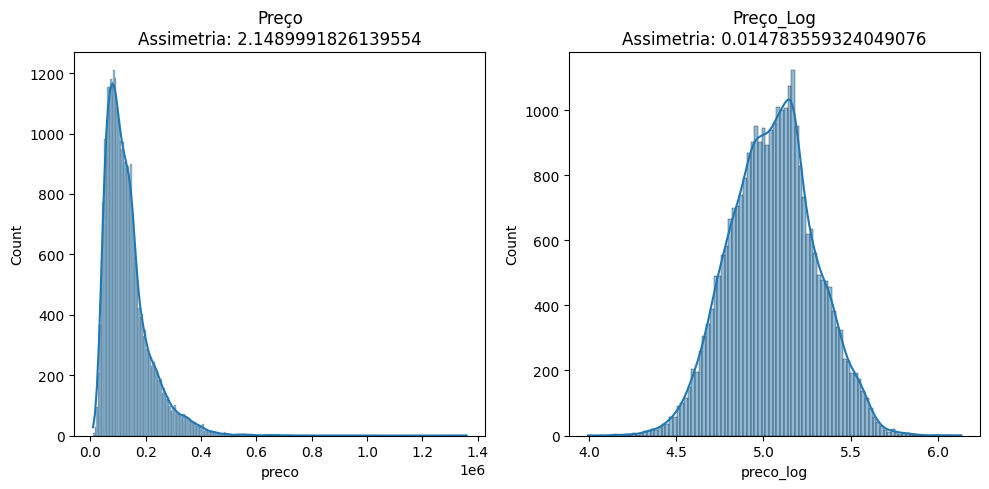

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
texto1 = f"""Preço
Assimetria: {dfTreino['preco'].skew()}"""
ax = sns.histplot(data=dfTreino, x='preco',kde=True)
titulo = ax.set_title(texto1)

plt.subplot(1, 2, 2)
dfTreino["preco_log"] = np.log10(dfTreino['preco'])
texto2 = f"""Preço_Log
Assimetria: {dfTreino['preco_log'].skew()}"""
ax = sns.histplot(data=dfTreino, x='preco_log',kde=True)
titulo = ax.set_title(texto2)

plt.tight_layout()
plt.show()

In [18]:
# @title Coeficientes de Correlação de Pearson (Features x Target)
matrizCorr = dfTreino.corr()
#matrizCorr = dfTreino.corr(numeric_only=True)

correlacaoPreco = pd.DataFrame(matrizCorr["preco"])
correlacaoPrecoLog = pd.DataFrame(matrizCorr["preco_log"])

dfCorr = pd.merge(correlacaoPreco, correlacaoPrecoLog, right_index= True, left_index = True)
dfCorr = dfCorr.drop(["preco","preco_log"])
#dfCorr.style.highlight_max(color="black").highlight_min(color="black")
dfCorr

,preco,preco_log
num_fotos,-0.031510,-0.041816
marca,0.108308,0.077099
modelo,0.084515,0.003884
ano_de_fabricacao,0.239172,0.333084
ano_modelo,0.214854,0.292651
hodometro,-0.359218,-0.406804
cambio,-0.176117,-0.259894
num_portas,-0.075265,-0.046848
tipo,0.065265,-0.006109
blindado,0.087746,0.069895


Separação dos Tipos das Features

In [ ]:
#lista de variáveis numéricas
COLUNAS_NUM_CONT = {"continuas": ["ano_de_fabricacao", "ano_modelo","hodometro"],
                    "discretas": ["num_fotos", "num_portas"]}

#Lista de variáveis categóricas
COLUNAS_CAT = ["marca",
               "modelo",
               "versao",
               "cambio",
               "tipo",
               "blindado",
               "cor",
               "tipo_vendedor",
               "cidade_vendedor",
               "estado_vendedor",
               "anunciante",
               "entrega_delivery",
               "troca",
               "dono_aceita_troca",
               "veiculo_único_dono",
               "revisoes_concessionaria",
               "ipva_pago",
               "veiculo_licenciado",
               "garantia_de_fábrica",
               "revisoes_dentro_agenda"]

Exploração das Relações Entre Features e Target

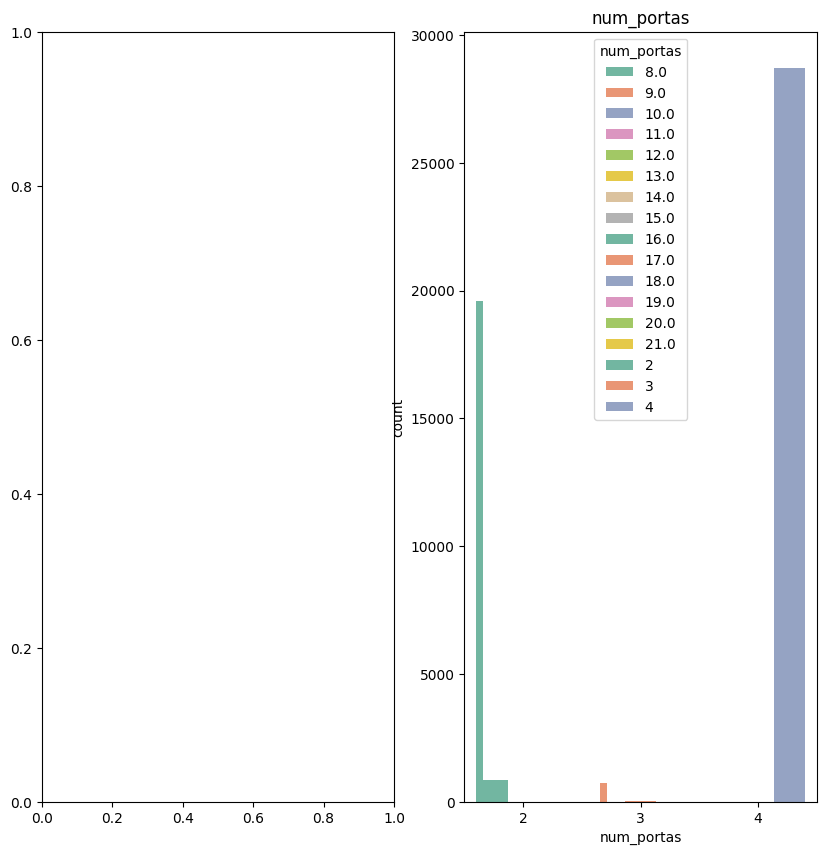

In [23]:
#Feature Numéricas Discretas
features = COLUNAS_NUM_CONT["discretas"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
for ax, feature in zip(axes.flat, features):
    data = dfTreino[feature].groupby()
    ax = sns.countplot(x=feature, data=dfTreino, hue=feature,palette="Set2")
    ax.set_title(feature)

plt.show()

In [ ]:
#Feature Numéricas Discretas
features = COLUNAS_NUM_CONT["discretas"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
for ax, feature in zip(axes.flat, features):
    x, y = dfTreino[feature], dfTreino["preco"]
    ax.scatter(x, y, alpha=0.5)
    ax.set_title(feature)

plt.show()

Verificação de Hipóteses


In [20]:
#Hipótese 1: Carros da marca Toyota possuem um preço médio mais alto em comparação com outras marcas populares.
#Hipótese 2: A maioria dos carros anunciados como "aceita troca" pertencem às marcas populares.
#Hipótese 3: Carros com transmissão automática possuem um preço médio mais alto do que carros com transmissão manual.

Questões de Negócio

In [21]:
#a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
#b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
#c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?